# Visualización de Imágenes Seleccionadas
Este Jupyter Notebook realiza la visualización de un conjunto de imágenes seleccionadas a partir de un archivo CSV que contiene la información de las imágenes, incluyendo la ruta de la imagen y su etiqueta de clase.

El objetivo principal de este Notebook es mostrar una selección de imágenes variadas en cuanto a las clases representadas. Para lograr esto, se utiliza el archivo CSV para identificar las clases únicas y luego se seleccionan un número igual de imágenes de cada clase. Luego, se visualizan las imágenes junto con sus etiquetas de clase correspondientes.

El flujo de trabajo del Notebook se divide en los siguientes bloques:

1. *Lectura del archivo CSV*: Se lee el archivo CSV que contiene la información de las imágenes, incluyendo la ruta de la imagen y su etiqueta de clase.
2. *Selección de imágenes variadas por clase*: Se obtienen las clases únicas presentes en el archivo CSV. A partir de estas clases, se seleccionan un número igual de imágenes de cada clase para lograr una variedad en la visualización.
3. *Visualización de las imágenes seleccionadas*: Se crea una figura con subplots para mostrar las imágenes seleccionadas. Cada imagen se lee desde el directorio de datos concatenando la ruta de la imagen del archivo CSV. Se muestra cada imagen junto con su etiqueta de clase correspondiente.

Este Notebook facilita la exploración y visualización de un conjunto de imágenes seleccionadas, permitiendo obtener una visión general de las clases representadas en el conjunto de datos.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # Para corregir el problema de los colores invertidos en las imágenes, se debe utilizar la función cv2.cvtColor()
import os
import random
from math import sqrt

In [35]:
# Ruta del archivo CSV de entrada
csv_path = "../../CSVs/dataset_renombrado.csv"

# Ruta del directorio donde se encuentran las imágenes
dataset_path = "../../Dataset/"

In [36]:
# Número máximo de imágenes a mostrar por clase
num_images_per_class = 5

### Lectura del archivo CSV

In [37]:
# Leer el archivo CSV
df = pd.read_csv(csv_path)

### Selección de imágenes variadas por clase

In [38]:
# Obtener las clases únicas
classes = df['class'].unique()

In [39]:
# Crear una lista vacía para almacenar las imágenes seleccionadas
selected_images = []

In [40]:
# Recorrer las clases y seleccionar imágenes aleatorias
for c in classes:
    images = df[df['class'] == c]['path'].tolist()
    selected_images.extend(random.sample(images, num_images_per_class))

In [41]:
# Número máximo de imágenes a mostrar
num_images = num_images_per_class * len(classes)

### Visualización de las imágenes seleccionadas

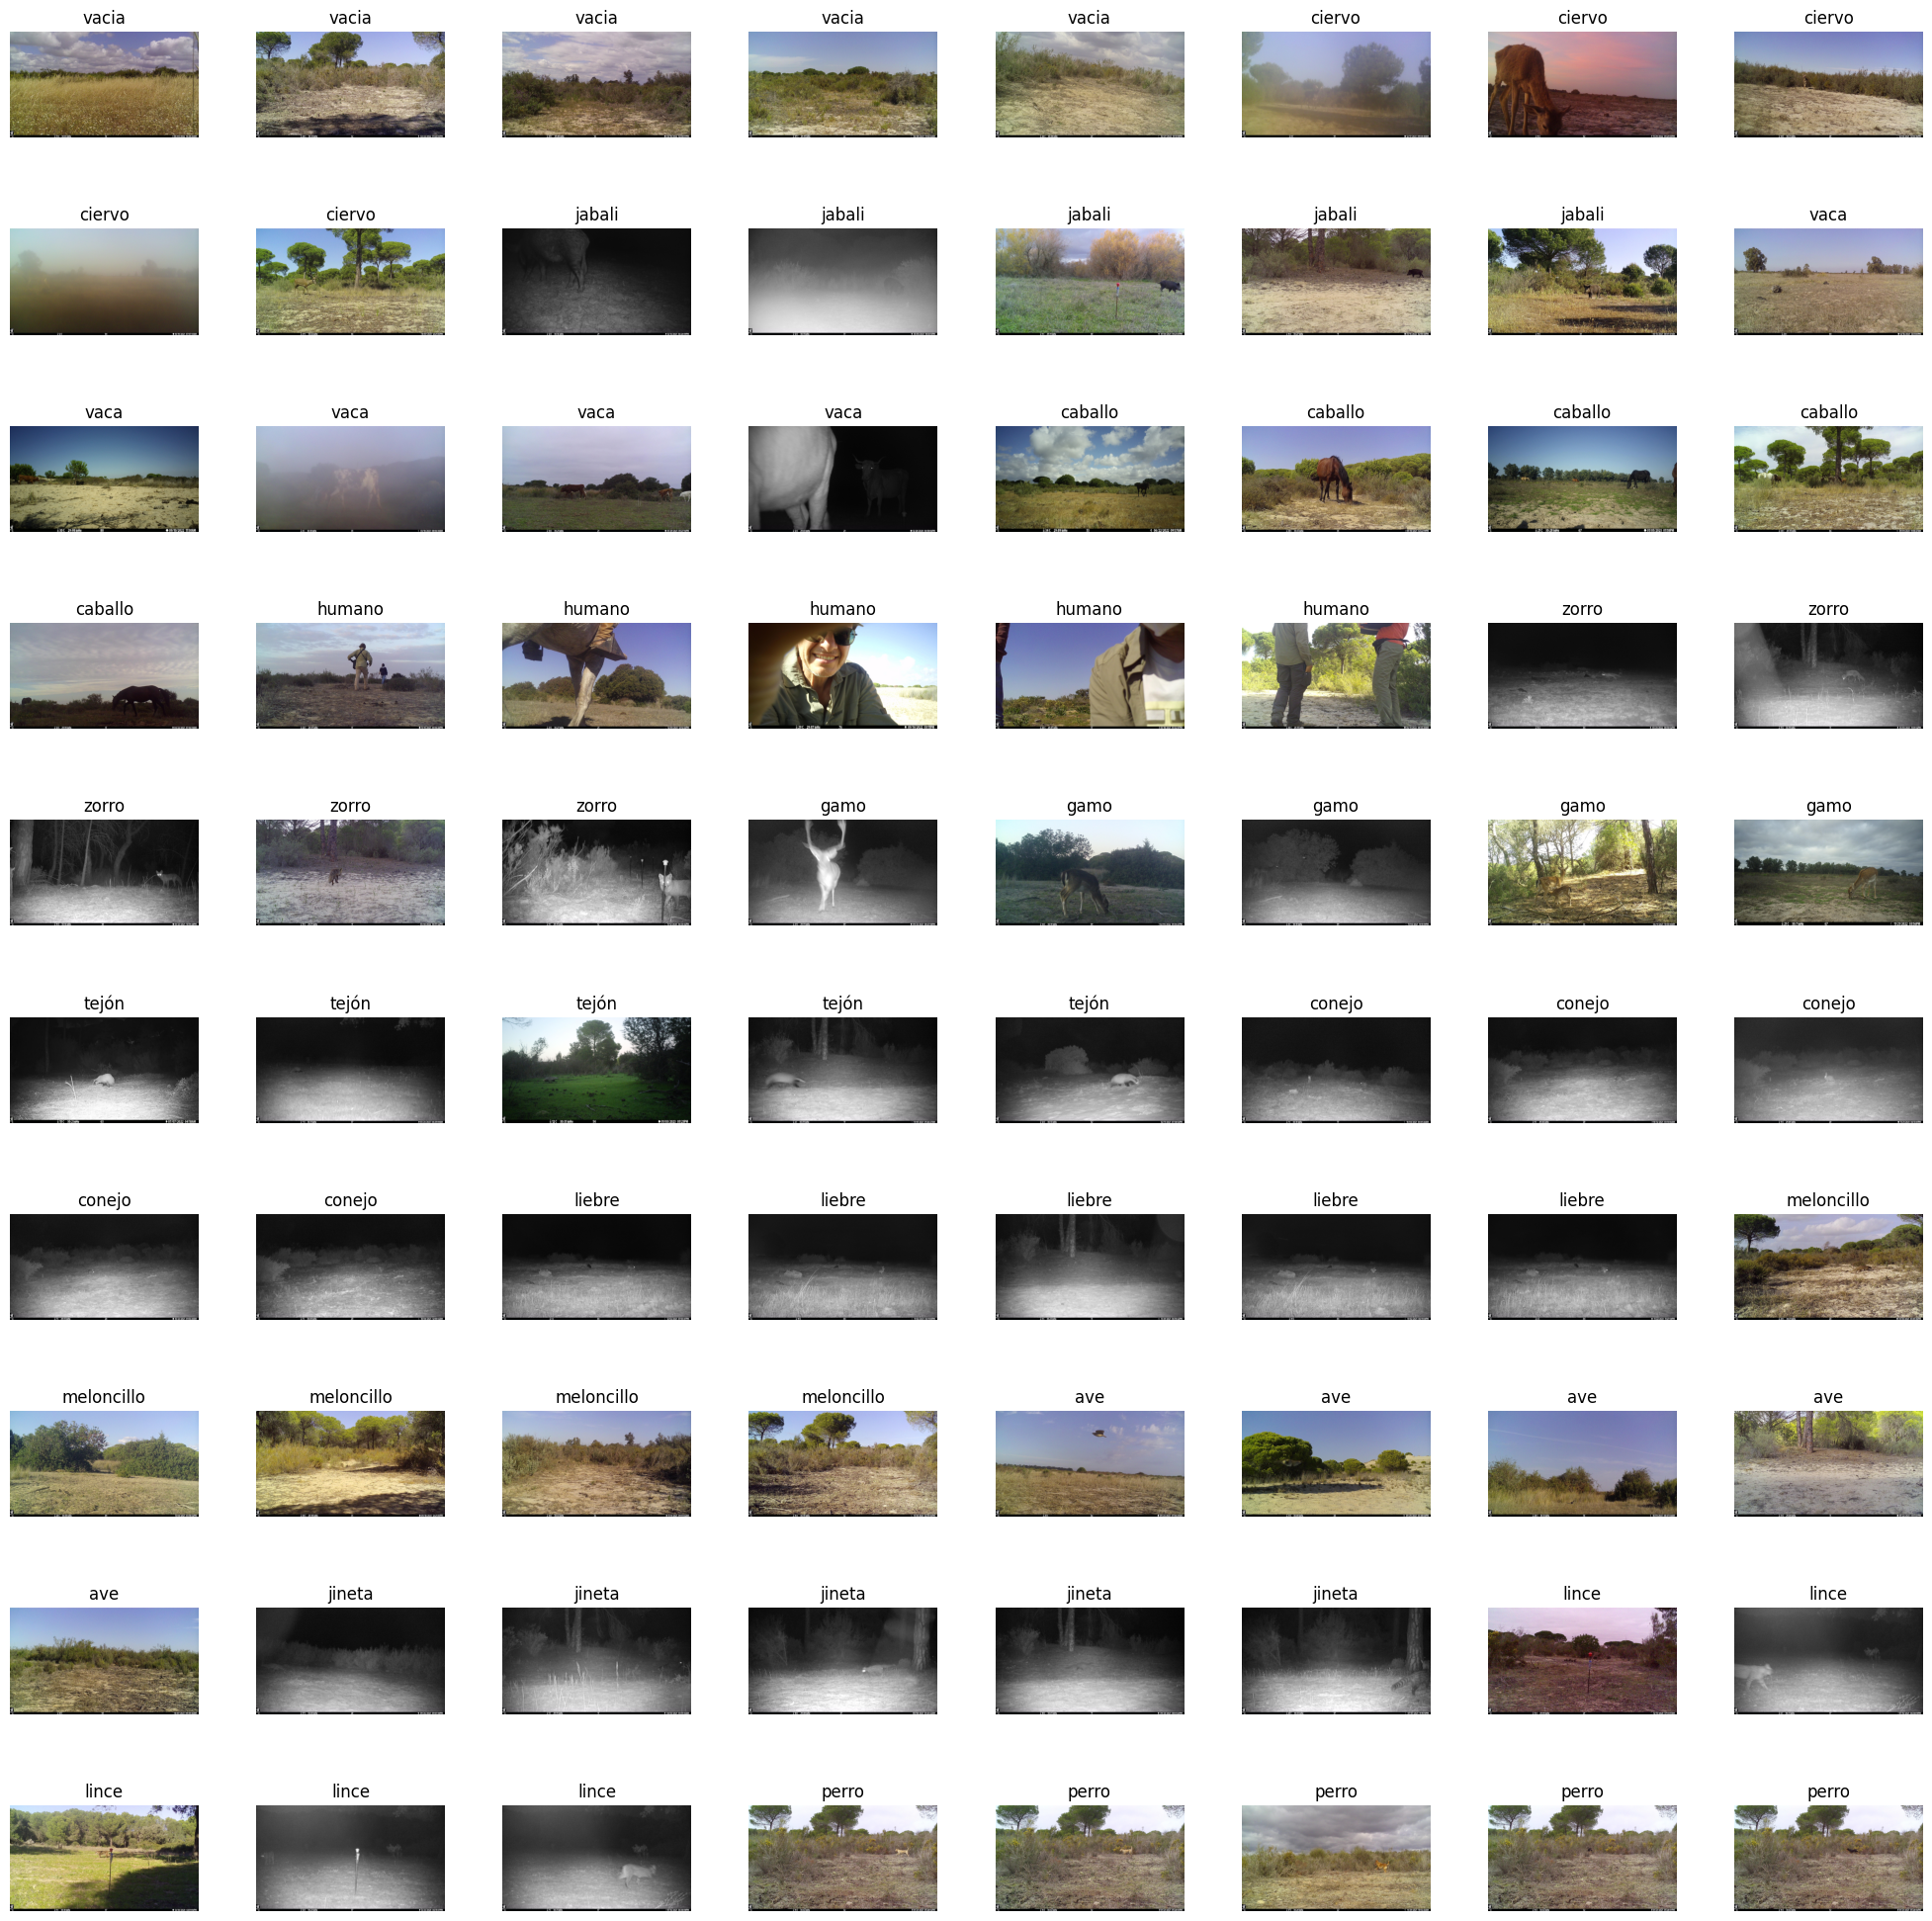

In [42]:
# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=num_images // int(sqrt(num_images)), ncols=int(sqrt(num_images)), figsize=(20, 20))
fig.tight_layout(pad=0.5)

# Recorrer los subplots y mostrar las imágenes con sus etiquetas
for i, ax in enumerate(axs.flat):
    image_path = os.path.join(dataset_path, selected_images[i])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Corregir los colores invertidos
    label = df[df['path'] == selected_images[i]]['class'].values[0]

    ax.imshow(image_rgb)
    ax.axis('off')
    ax.set_title(label)

# Mostrar la figura
plt.show()